
# Heart Stroke Prediciton
Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df = pd.read_csv((Path("data\healthcare-dataset-stroke-data.csv")))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df['age'].value_counts().unique()


array([102,  95,  90,  87,  86,  85,  83,  80,  79,  77,  76,  75,  74,
        73,  72,  71,  70,  68,  66,  65,  64,  62,  61,  60,  59,  58,
        57,  56,  55,  54,  53,  52,  51,  50,  49,  47,  46,  45,  42,
        40,  38,  36,  35,  34,  32,  24,   9,   8,   6,   5,   4,   3,
         2])

In [11]:
df[df['age'] ==2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
437,5010,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
683,15274,Female,2.0,0,0,No,children,Rural,79.89,31.6,Unknown,0
750,8320,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
783,14387,Male,2.0,0,0,No,children,Urban,93.88,17.4,Unknown,0
830,65218,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
856,71929,Male,2.0,0,0,No,children,Rural,56.77,20.9,Unknown,0
986,46323,Female,2.0,0,0,No,children,Rural,165.11,18.0,Unknown,0
1132,46072,Male,2.0,0,0,No,children,Rural,103.25,19.4,Unknown,0
1182,63565,Female,2.0,0,0,No,children,Rural,125.68,20.1,Unknown,0
1185,26389,Female,2.0,0,0,No,children,Urban,120.85,16.2,Unknown,0


In [12]:

df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
for i in  df.columns:
    print( i, '\t ',df[i].unique())

id 	  [ 9046 51676 31112 ... 19723 37544 44679]
gender 	  ['Male' 'Female' 'Other']
age 	  [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Statistical Inferences
* Median age of population is 43 years.
* 25% of the population is aged below 25
* Another 25% is aged above 60 and remaining in between these ages.
* Average glucose levels of the population is 106
* About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
* People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

In [25]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
numerical_features = [ i for i in df.columns if df[i].dtype !='O']
categorical_feaures =[i for i in df.columns if df[i].dtype=="O"]

# # define numerical & categorical columns
# numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('numerical categorical',numerical_features)
print('categories',categorical_feaures)

numerical categorical ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categories ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [30]:
for i in categorical_feaures:
    print(i,'\t',df[i].value_counts(normalize=True) * 100)
    print('---------------------------')

gender 	 gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
---------------------------
ever_married 	 ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
---------------------------
work_type 	 work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
---------------------------
Residence_type 	 Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
---------------------------
smoking_status 	 smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
---------------------------


# Univiriate analysis

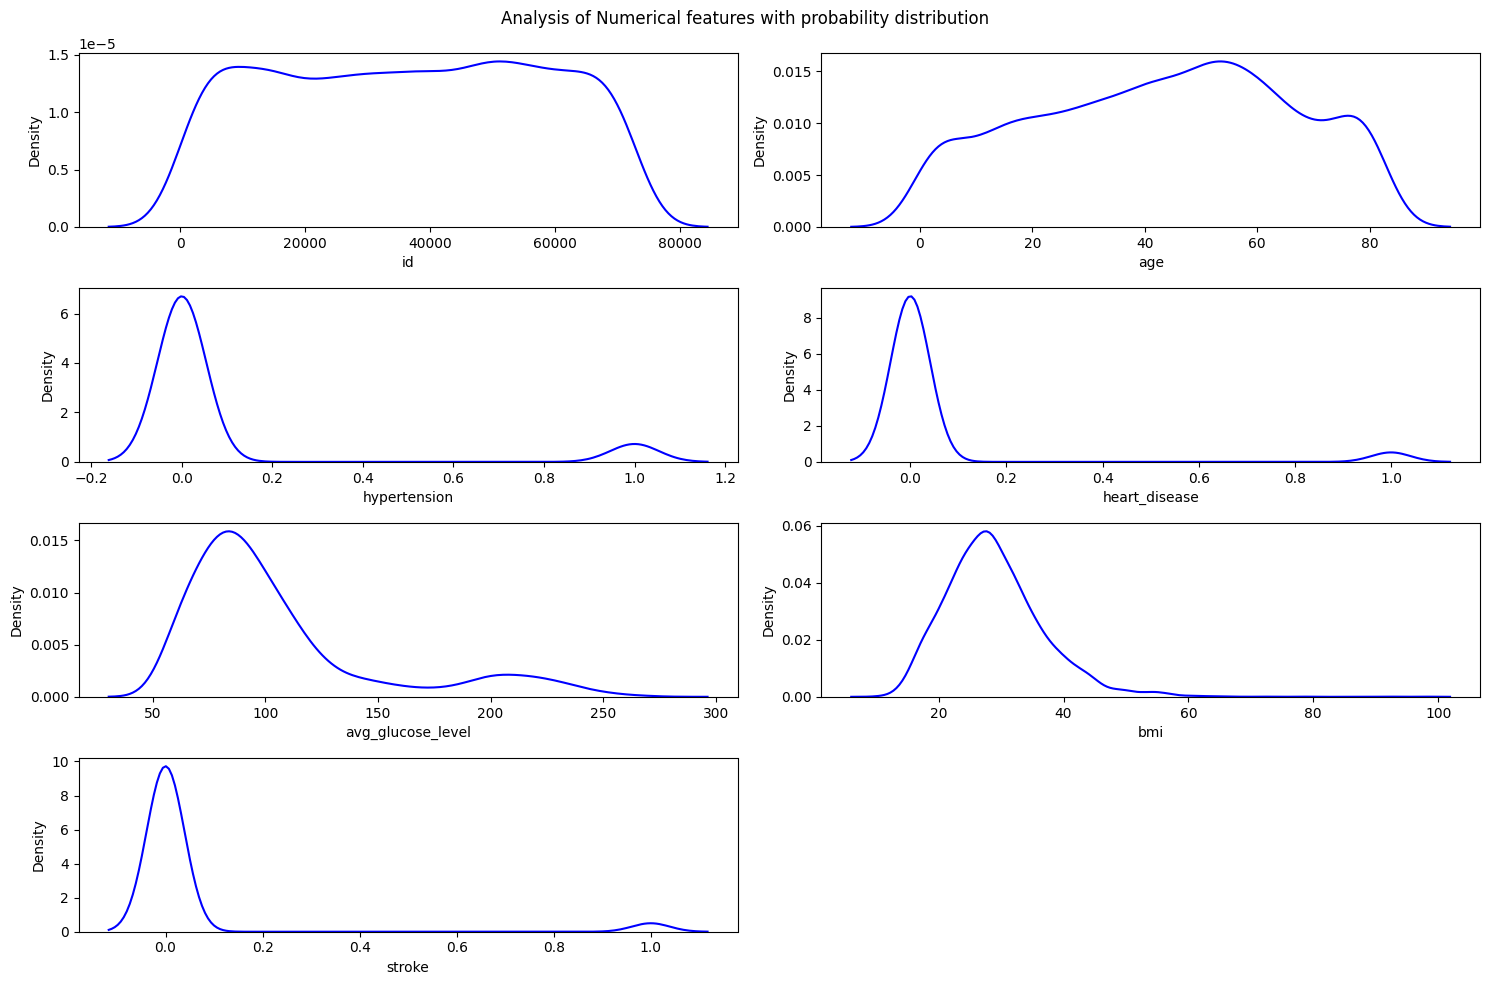

In [36]:
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical features with probability distribution')

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])

    plt.tight_layout()

# Specify the path to save the image
plt.savefig('./images/numerical_features_distribution.png')

# Close the plot to free up memory
# plt.close()

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical features with Barplot')

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])

    plt.tight_layout()

# Specify the path to save the image
plt.savefig('./images/bar_plot_distribution.png')

# Close the plot to free up memory
# plt.close()

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assume 'df' is your DataFrame with the features

# Create the "images" folder if it doesn't exist
if not os.path.exists('./images'):
    os.makedirs('./images')

# Create a bar plot for each feature
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.savefig('./images/{}.png'.format(feature))
    plt.close()

# Create a scatter plot for each pair of features
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df[df.columns[i]], df[df.columns[j]])
        plt.title(f'Relationship between {df.columns[i]} and {df.columns[j]}')
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.savefig('./images/{}_vs_{}.png'.format(df.columns[i], df.columns[j]))
        plt.close()

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.io as pio
pio.renderers.default='browser'
# Assume 'df' is your DataFrame with the features

# Select only the numerical columns (except 'id')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('id')

# Create a subplot with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=numerical_cols)

# Create a scatter plot for each pair of features
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        row = (i // 3) + 1
        col = (i % 3) + 1
        fig.add_trace(go.Scatter(x=df[numerical_cols[i]], y=df[numerical_cols[j]], mode='markers'), row=row, col=col)

# Show the plot
fig.show()

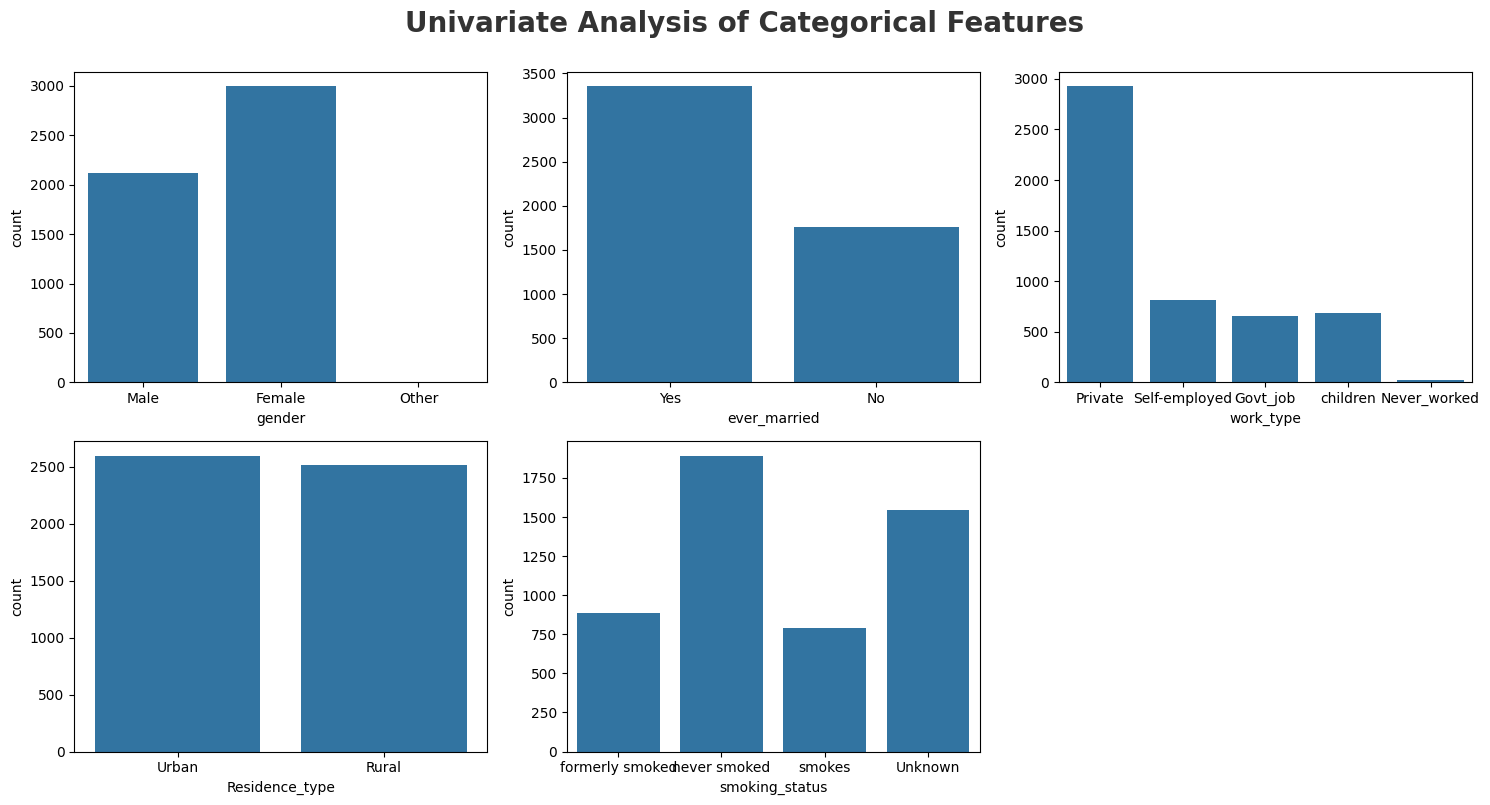

In [55]:

# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feaures)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_feaures[i]])
    plt.xlabel(categorical_feaures[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Cat.png')

# Multiviriate Analysis

In [57]:
discrete_features=[feature for feature in numerical_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numerical_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numerical_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded_categorical : ['hypertension', 'heart_disease', 'stroke']


In [59]:
categorical_features = categorical_feaures + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


In [61]:
df[continuous_features].corr()

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.003084
age,0.003538,1.000000,0.238171,0.333398
avg_glucose_level,0.001092,0.238171,1.000000,0.175502
bmi,0.003084,0.333398,0.175502,1.000000


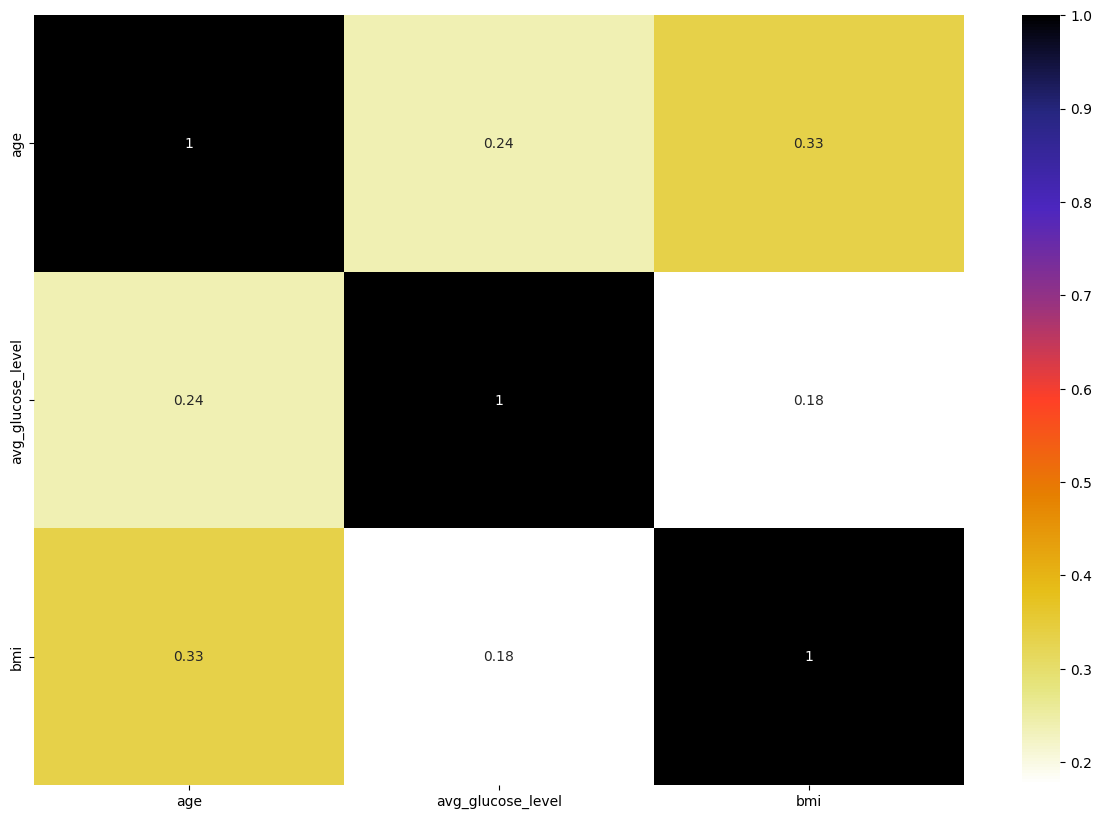

In [62]:
plt.figure(figsize = (15,10))
cont_features = continuous_features.copy()
cont_features.remove('id')
sns.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

In [63]:
categorical_features

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease',
 'stroke']

In [69]:
from scipy.stats import chi2_contingency
chi2_test = []
for i in categorical_features:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['stroke'], df[i]))
    chi2_test.append((i, chi2, p))
    result = pd.DataFrame(data = [categorical_features,chi2_test]).abs
    # result.columns = ['Feature', 'Chi-Square Value', 'P-Value']
    print(result)

<bound method NDFrame.abs of                                                    0             1          2  \
0                                             gender  ever_married  work_type   
1  (gender, 0.47258662884530234, 0.7895490538408245)          None       None   

                3               4             5              6       7  
0  Residence_type  smoking_status  hypertension  heart_disease  stroke  
1            None            None          None           None    None  >
<bound method NDFrame.abs of                                                    0  \
0                                             gender   
1  (gender, 0.47258662884530234, 0.7895490538408245)   

                                                   1          2  \
0                                       ever_married  work_type   
1  (ever_married, 58.923890259034195, 1.638902114...       None   

                3               4             5              6       7  
0  Residence_type  smoking_status 

In [70]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['stroke'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,ever_married,Reject Null Hypothesis
2,work_type,Reject Null Hypothesis
3,Residence_type,Fail to Reject Null Hypothesis
4,smoking_status,Reject Null Hypothesis
5,hypertension,Reject Null Hypothesis
6,heart_disease,Reject Null Hypothesis
7,stroke,Reject Null Hypothesis


In [79]:
for i in chi2_contingency(pd.crosstab(df['stroke'], df['age'])):
    print(i)

491.74772174600236
5.161745862440664e-52
103
[[ 1.90254403  2.85381605  4.75636008  4.75636008  1.90254403  2.85381605
   4.75636008  3.80508806  4.75636008  3.80508806  4.75636008  4.75636008
   7.61017613  3.80508806  7.61017613  7.61017613  2.85381605  5.70763209
   3.80508806  7.61017613  5.70763209  8.56144814  7.61017613 52.31996086
  43.75851272 32.34324853 61.83268102 22.83052838 30.4407045  55.17377691
  36.14833659 33.29452055 34.24579256 42.8072407  54.22250489 51.36868885
  42.8072407  49.46614481 57.07632094 57.07632094 47.56360078 56.12504892
  44.70978474 42.8072407  60.881409   52.31996086 54.22250489 58.97886497
  52.31996086 51.36868885 48.5148728  52.31996086 75.15048924 67.54031311
  54.22250489 64.68649706 51.36868885 49.46614481 72.29667319 68.49158513
  67.54031311 70.39412916 69.44285714 67.54031311 66.5890411  71.34540117
  80.85812133 58.97886497 71.34540117 62.78395303 75.15048924 78.9555773
  81.80939335 85.61448141 80.85812133 82.76066536 78.9555773  73.247

In [81]:
chi2_contingency(pd.crosstab(df['stroke'], df['gender']))

Chi2ContingencyResult(statistic=np.float64(0.47258662884530234), pvalue=np.float64(0.7895490538408245), dof=2, expected_freq=array([[2.84810841e+03, 2.01194031e+03, 9.51272016e-01],
       [1.45891585e+02, 1.03059687e+02, 4.87279843e-02]]))

In [83]:
from scipy.stats import chi2_contingency

# Define the target column
target = 'stroke'

# Iterate over each feature
for feature in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Feature: {feature}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    
    # Interpret the results
    if p < 0.05:
        print(f"Reject the null hypothesis - {feature} is associated with {target}")
    else:
        print(f"Fail to reject the null hypothesis - {feature} is not associated with {target}")
    
    print()

Feature: gender
Chi-squared statistic: 0.47258662884530234
p-value: 0.7895490538408245
Degrees of freedom: 2
Fail to reject the null hypothesis - gender is not associated with stroke

Feature: ever_married
Chi-squared statistic: 58.923890259034195
p-value: 1.6389021142314745e-14
Degrees of freedom: 1
Reject the null hypothesis - ever_married is associated with stroke

Feature: work_type
Chi-squared statistic: 49.163511976675295
p-value: 5.397707801896119e-10
Degrees of freedom: 4
Reject the null hypothesis - work_type is associated with stroke

Feature: Residence_type
Chi-squared statistic: 1.0816367471627524
p-value: 0.29833169286876987
Degrees of freedom: 1
Fail to reject the null hypothesis - Residence_type is not associated with stroke

Feature: smoking_status
Chi-squared statistic: 29.147269191399264
p-value: 2.0853997025008455e-06
Degrees of freedom: 3
Reject the null hypothesis - smoking_status is associated with stroke

Feature: hypertension
Chi-squared statistic: 81.6053682482

In [85]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define the target column
target = 'stroke'

# Initialize an empty list to store the results
results = []

# Iterate over each feature
for feature in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in a dictionary
    result = {
        'Feature': feature,
        'Chi-squared Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Association': 'Yes' if p < 0.05 else 'No'
    }
    
    # Append the result to the list
    results.append(result)

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
results_df

,Feature,Chi-squared Statistic,p-value,Degrees of Freedom,Association
0,gender,0.472587,7.895491e-01,2,No
1,ever_married,58.923890,1.638902e-14,1,Yes
2,work_type,49.163512,5.397708e-10,4,Yes
3,Residence_type,1.081637,2.983317e-01,1,No
4,smoking_status,29.147269,2.085400e-06,3,Yes
5,hypertension,81.605368,1.661622e-19,1,Yes
6,heart_disease,90.259561,2.088785e-21,1,Yes


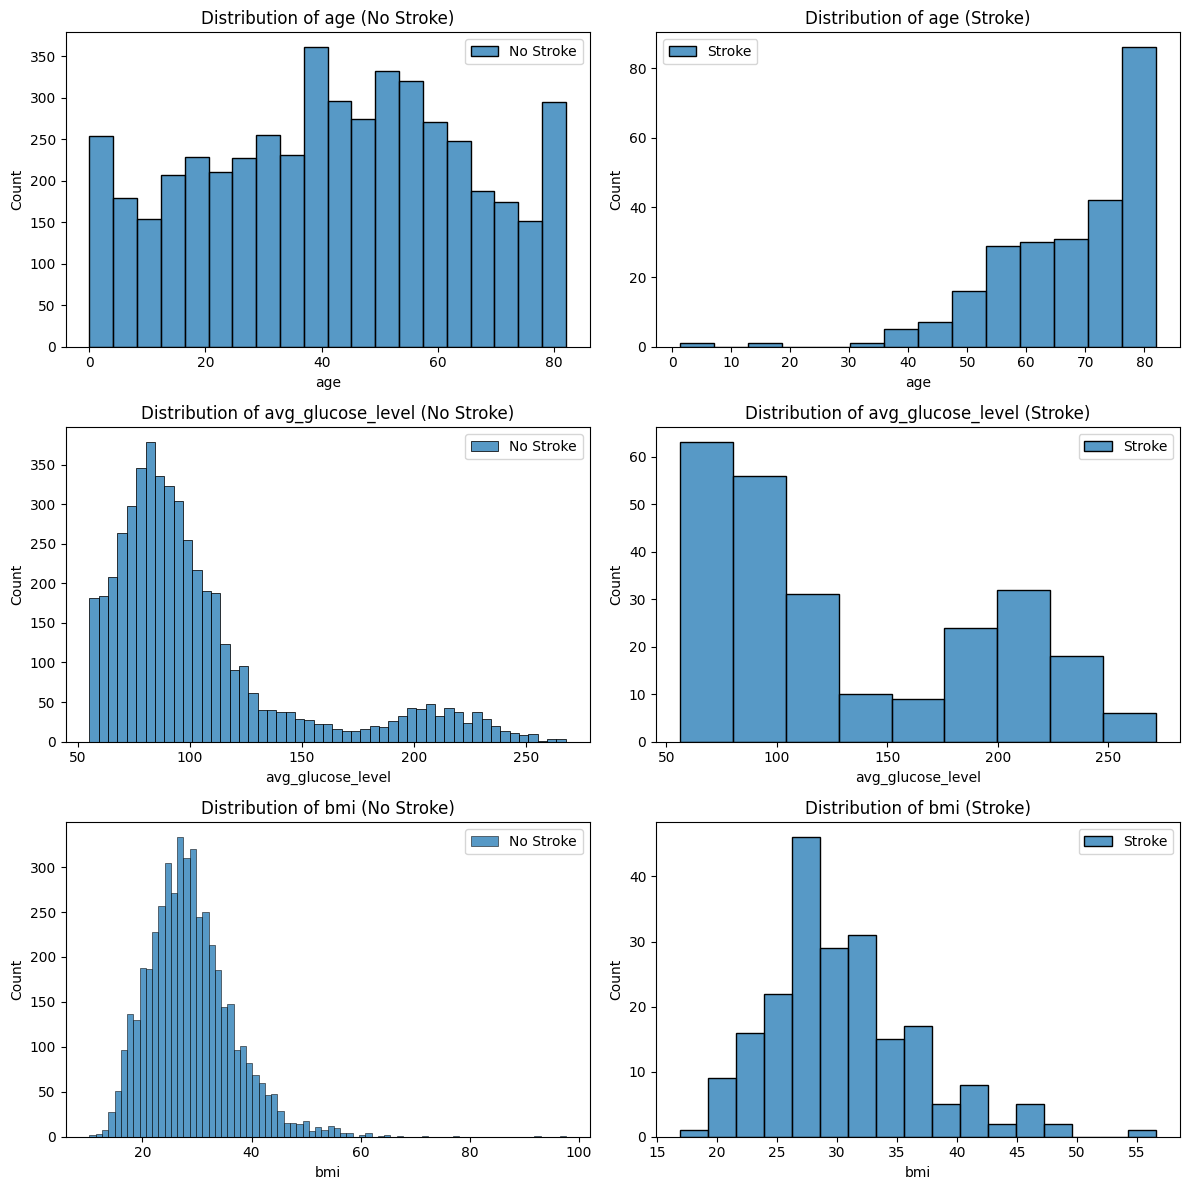

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Define the target column
target = 'stroke'

# Create a figure with subplots
fig, axs = plt.subplots(len(numerical_features), 2, figsize=(12, 12))

# Iterate over each numerical feature
for i, feature in enumerate(numerical_features):
    # Plot the distribution of the feature for each outcome of the target column
    sns.histplot(df[df[target] == 0][feature], ax=axs[i, 0], label='No Stroke')
    sns.histplot(df[df[target] == 1][feature], ax=axs[i, 1], label='Stroke')
    
    # Set the title and labels
    axs[i, 0].set_title(f'Distribution of {feature} (No Stroke)')
    axs[i, 1].set_title(f'Distribution of {feature} (Stroke)')
    axs[i, 0].set_xlabel(feature)
    axs[i, 1].set_xlabel(feature)
    
    # Add a legend
    axs[i, 0].legend()
    axs[i, 1].legend()

# Show the plot
plt.tight_layout()
plt.show()

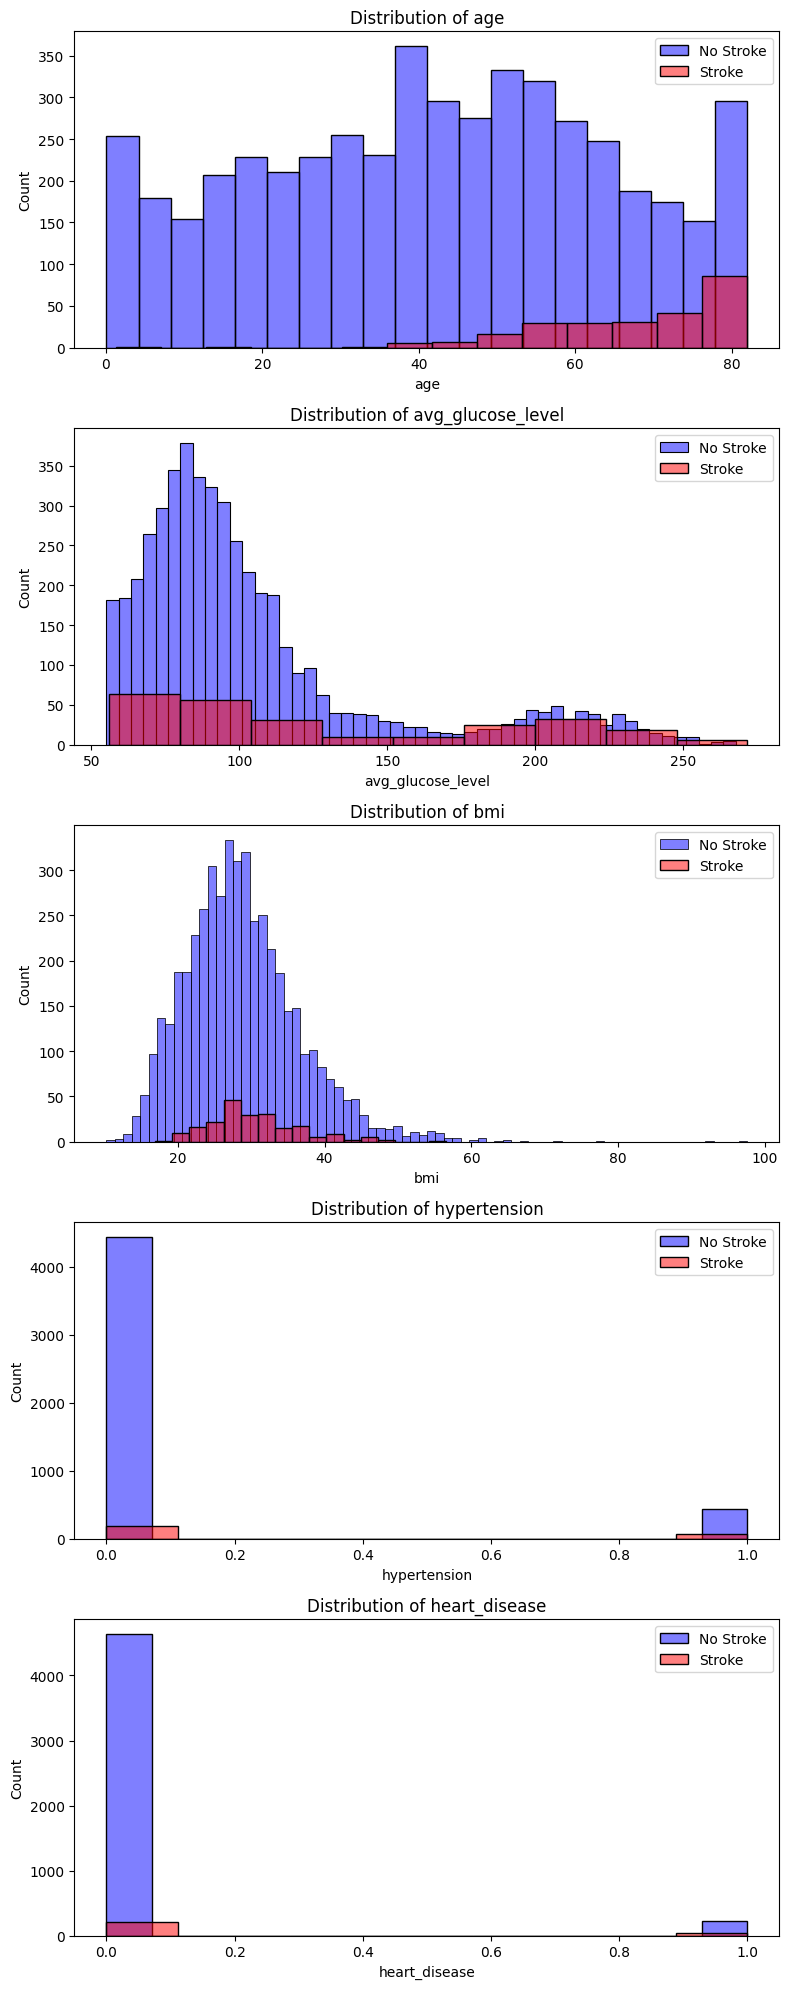

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']

# Define the target column
target = 'stroke'

# Create a figure with subplots
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(8, 20))

# Iterate over each numerical feature
for i, feature in enumerate(numerical_features):
    # Plot the distribution of the feature for each outcome of the target column
    sns.histplot(df[df[target] == 0][feature], ax=axs[i], label='No Stroke', color='blue', alpha=0.5)
    sns.histplot(df[df[target] == 1][feature], ax=axs[i], label='Stroke', color='red', alpha=0.5)
    
    # Set the title and labels
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    
    # Add a legend
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()

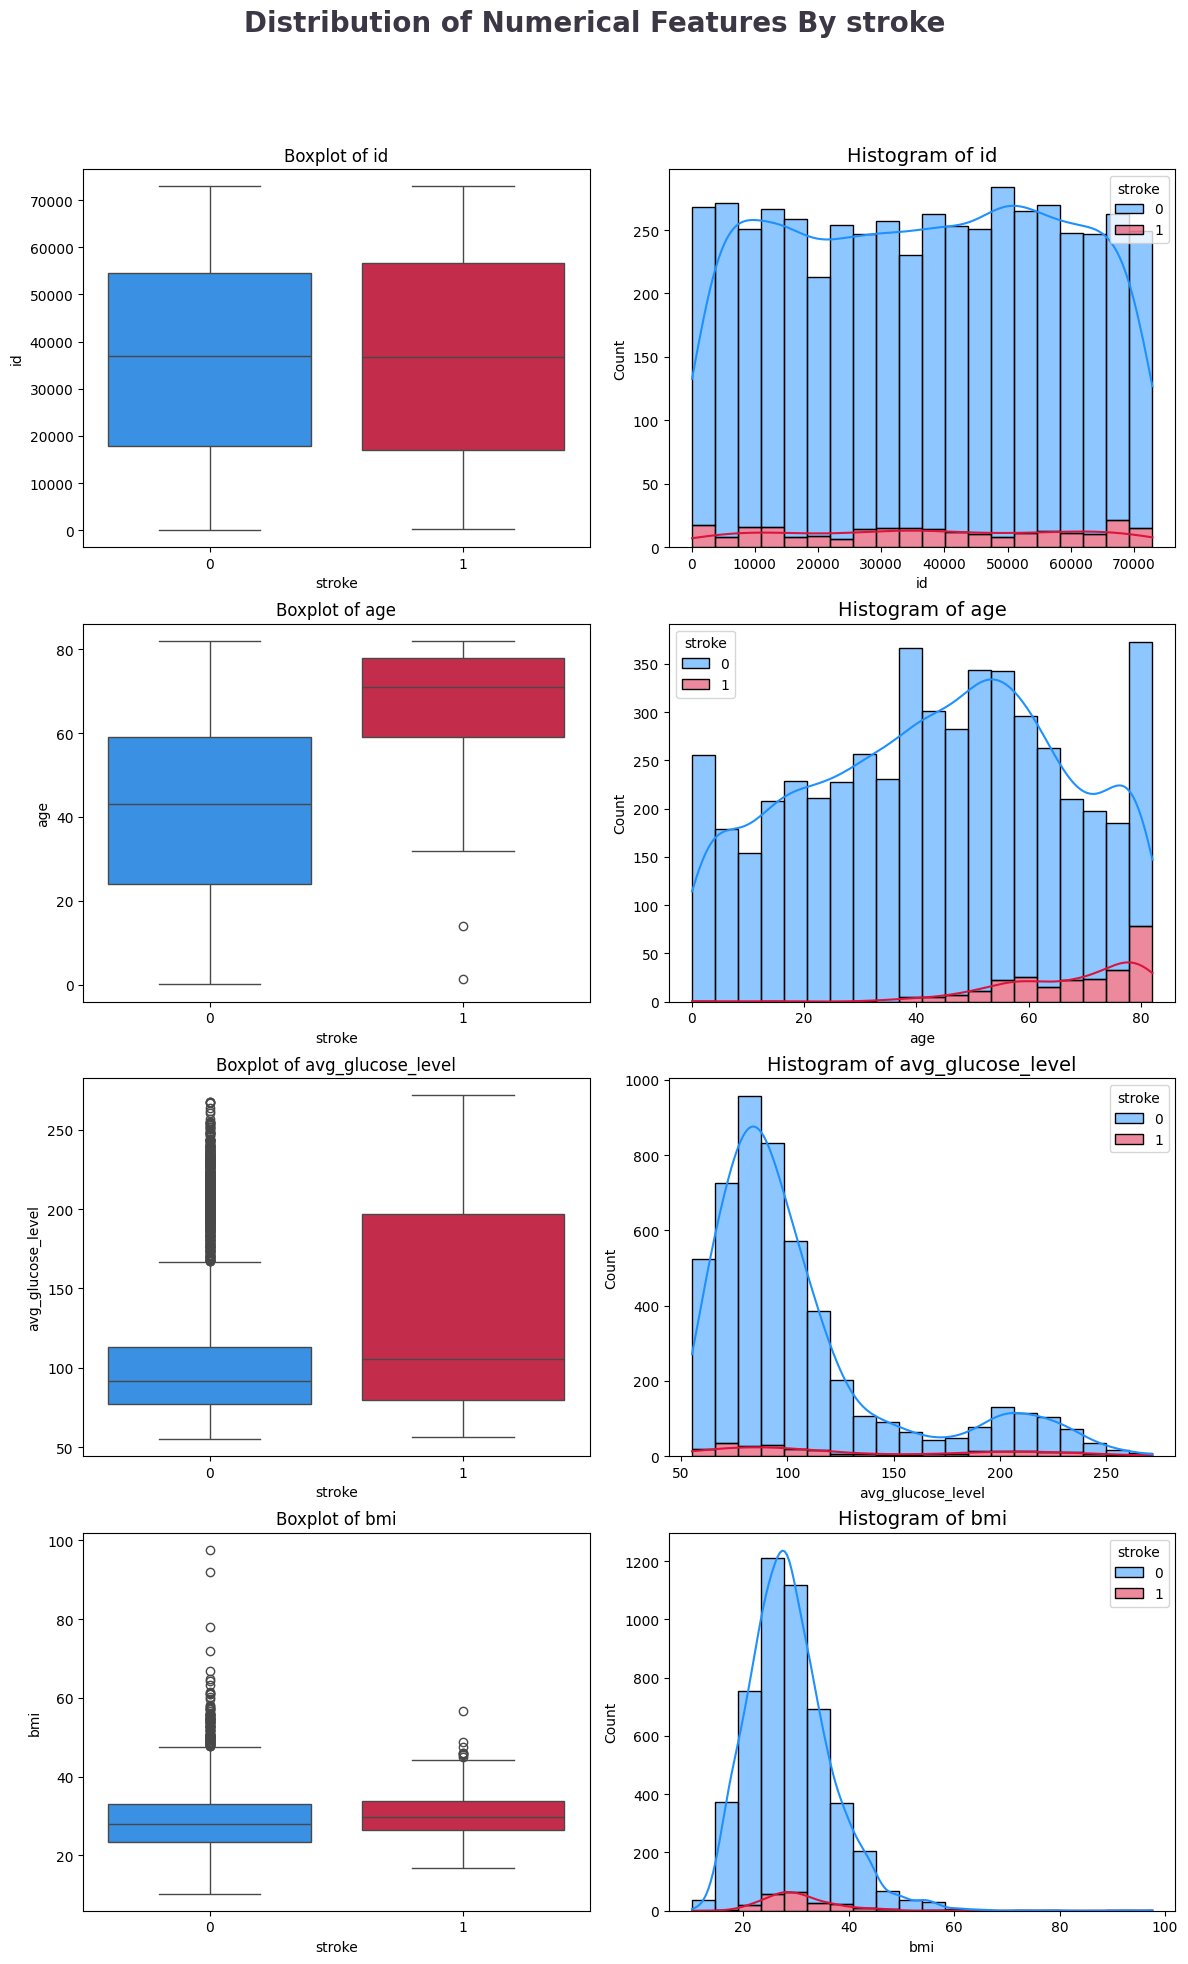

In [89]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features By stroke', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='stroke', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='stroke', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

In [91]:

df1 = df.copy()
df1.gender = np.where(df.gender == 'Other', 'Female', df.gender)
df1['stroke'] = np.where((df.stroke == 1),'Stroke', 'Not-Stroke' )


In [92]:
df1.stroke.unique()

array(['Stroke', 'Not-Stroke'], dtype=object)

In [93]:
df1[df1.stroke == 'Stroke'].gender.value_counts(normalize=True)

gender
Female    0.566265
Male      0.433735
Name: proportion, dtype: float64

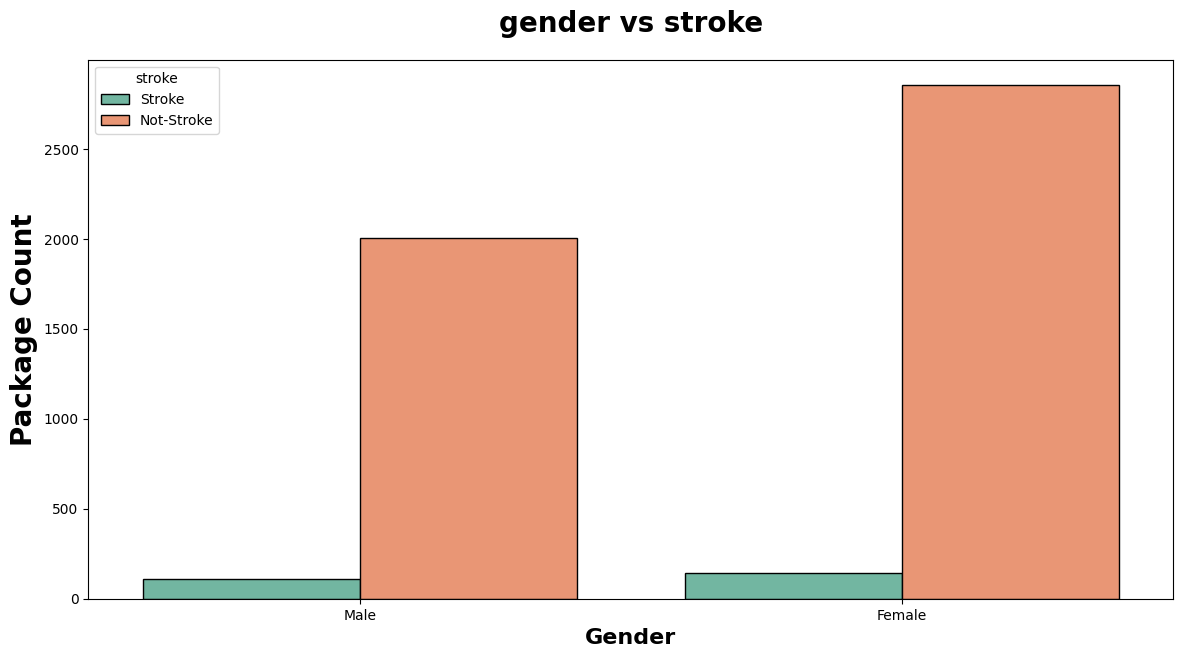

In [94]:

plt.subplots(figsize=(14,7))
sns.countplot(x="gender",hue="stroke", data=df1,ec = "black",palette="Set2")
plt.title("gender vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

In [96]:

bins= [0,10,20,50,85]
labels = ['Children','Teens','Adult','Senior']
df2 = df1.copy()
df2['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['age_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,age_cat,stroke,count
0,Children,Not-Stroke,471
1,Children,Stroke,1
2,Teens,Not-Stroke,493
3,Teens,Stroke,1
4,Adult,Not-Stroke,1916
5,Adult,Stroke,18
6,Senior,Not-Stroke,1981
7,Senior,Stroke,229


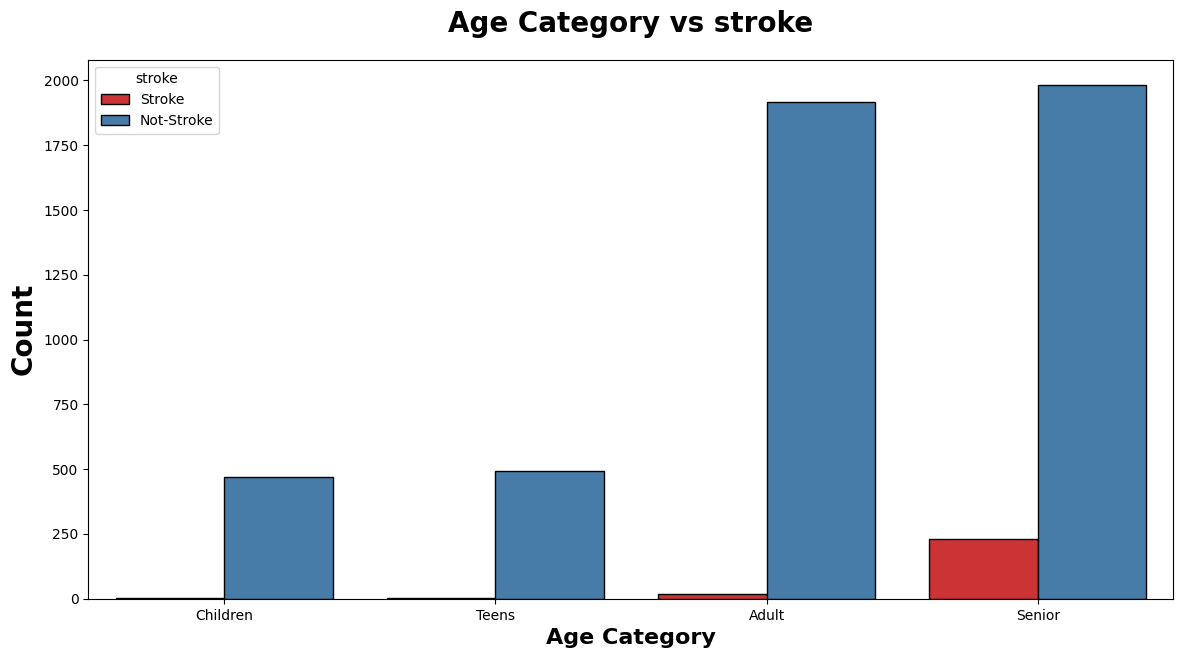

In [97]:
plt.subplots(figsize=(14,7))
sns.countplot(x="age_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("Age Category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

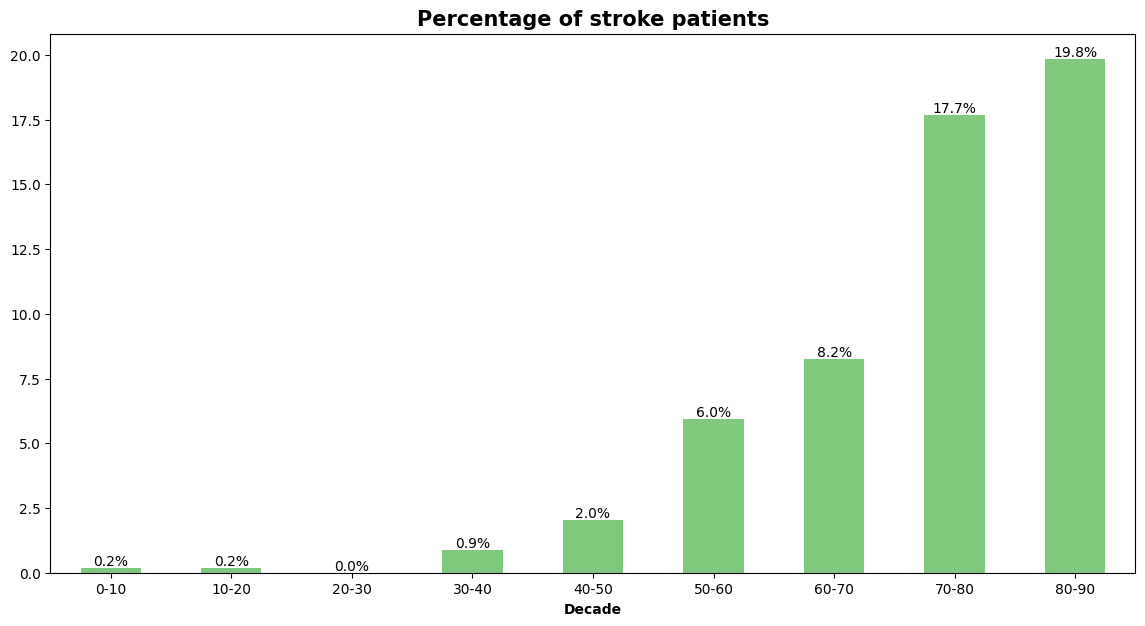

In [98]:
df2= df.copy()
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age_group']=pd.cut(df['age'],bins=bins,labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14,7])

(100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Decade' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

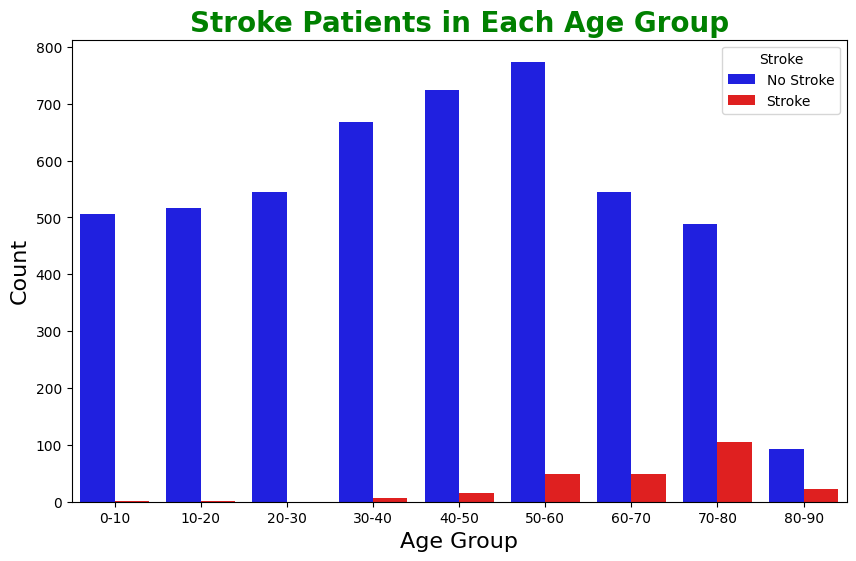

In [99]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of stroke patients in each age group
stroke_percentage = (100 * df2[df2["stroke"] == 1]['age_group'].value_counts() / df2['age_group'].value_counts()).reset_index()
stroke_percentage.columns = ['age_group', 'percentage']

# Create a stacked bar chart using Plotly
fig = px.bar(stroke_percentage, x='age_group', y='percentage', color_discrete_sequence=['red'], title='Percentage of Stroke Patients in Each Age Group')
fig.update_layout(title_font_color='blue', title_font_size=20)

# Show the percentage values on top of the bars
for i, perc in enumerate(stroke_percentage['percentage']):
    fig.add_annotation(x=stroke_percentage['age_group'].iloc[i], y=perc, text=f'{perc:.2f}%', showarrow=False)

# Show the plot
fig.show()

# Alternatively, you can use Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='stroke', data=df2, palette=['blue', 'red'])
plt.title('Stroke Patients in Each Age Group', fontsize=20, fontweight='bold', color='green')
plt.xlabel('Age Group', fontsize=16, color='black')
plt.ylabel('Count', fontsize=16, color='black')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

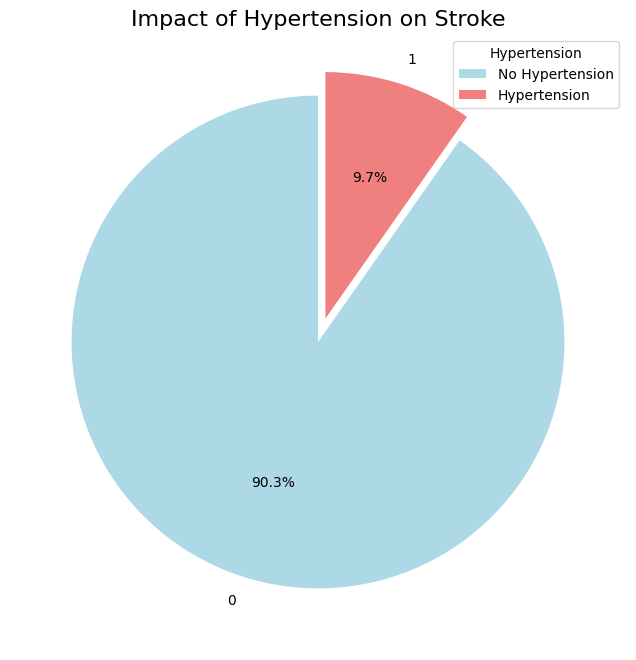

In [100]:
import matplotlib.pyplot as plt
import plotly.express as px

# Bar plot
hypertension_stroke = df2.groupby(['stroke', 'hypertension']).size().reset_index(name='count')
hypertension_stroke['percentage'] = hypertension_stroke['count'] / hypertension_stroke['count'].sum() * 100

fig = px.bar(hypertension_stroke, x='stroke', y='percentage', color='hypertension', color_discrete_sequence=['lightblue', 'lightcoral'], title='Hypertension vs Stroke')
fig.update_layout(xaxis_title='Stroke', yaxis_title='Percentage', legend_title='Hypertension')

for i, perc in enumerate(hypertension_stroke['percentage']):
    fig.add_annotation(x=hypertension_stroke['stroke'].iloc[i], y=perc, text=f'{perc:.2f}%', showarrow=False)

fig.show()

# Exploding pie chart
hypertension_stroke_pie = df2['hypertension'].value_counts().reset_index()
hypertension_stroke_pie.columns = ['Hypertension', 'Count']
hypertension_stroke_pie['Percentage'] = hypertension_stroke_pie['Count'] / hypertension_stroke_pie['Count'].sum() * 100

explode = [0.1 if hypertension_stroke_pie['Hypertension'].iloc[i] == 1 else 0 for i in range(len(hypertension_stroke_pie))]

plt.figure(figsize=(8, 8))
plt.pie(hypertension_stroke_pie['Percentage'], explode=explode, labels=hypertension_stroke_pie['Hypertension'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Impact of Hypertension on Stroke', fontsize=16, color='black')
plt.legend(title='Hypertension', labels=['No Hypertension', 'Hypertension'], loc='upper right')
plt.show()

In [102]:
df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()

stroke
0    1281
1      37
Name: count, dtype: int64

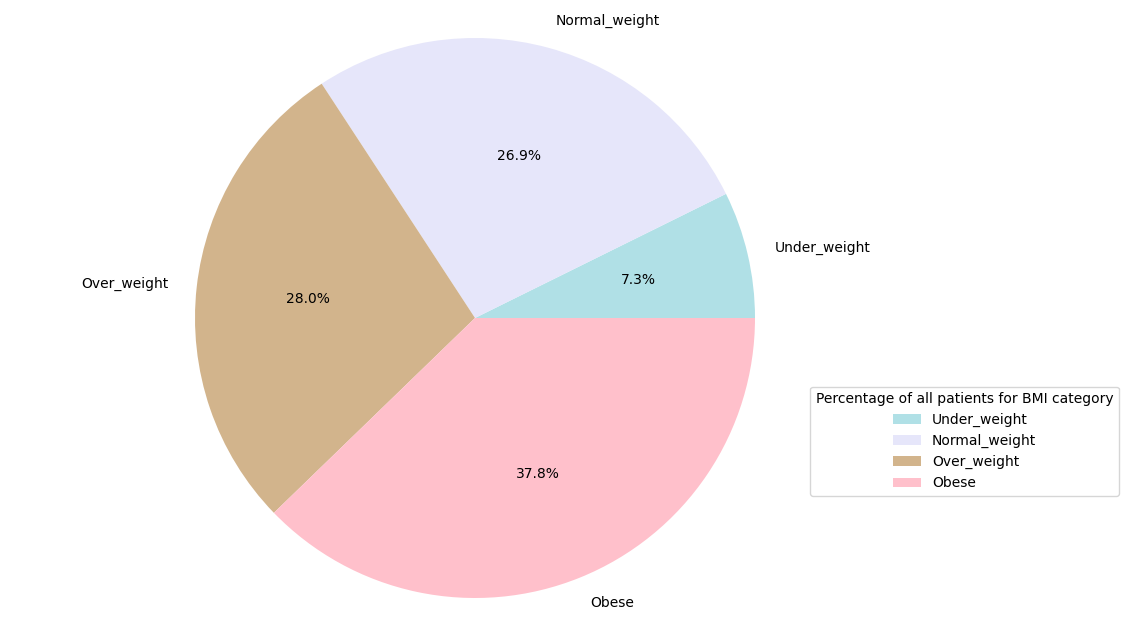

In [103]:

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(x=[df[df['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()[0] , 
df[(df['bmi'] <= 30) & (df['bmi'] > 25)]['stroke'].value_counts()[0] , 
df[df['bmi'] > 30]['stroke'].value_counts()[0] ], 
labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "Percentage of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.2, 0.4))
plt.show() 

In [104]:

df2= df.copy()
bins=[0,18,25,30,100]
labels=['0-18','18-25','25-30','30-100']
df2['bmi_cat']=pd.cut(df['bmi'],bins=bins,labels=labels)
bmi_group = df2.groupby(['bmi_cat', 'stroke'])['id'].count().reset_index(name='count')
bmi_group

,bmi_cat,stroke,count
0,0-18,0,288
1,0-18,1,1
2,18-25,0,1281
3,18-25,1,37
4,25-30,0,1334
5,25-30,1,75
6,30-100,0,1797
7,30-100,1,96


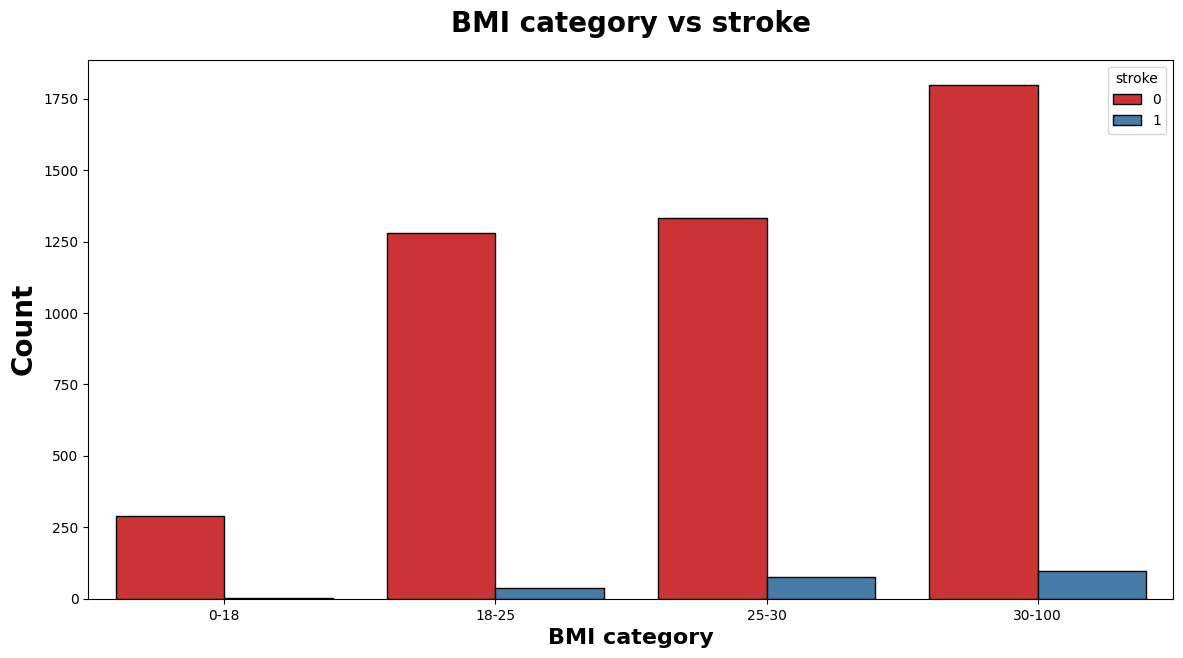

In [105]:

plt.subplots(figsize=(14,7))
sns.countplot(x="bmi_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("BMI category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("BMI category", weight="bold", fontsize=16)
plt.show()